____
__Universite de Technologie de Troyes__<br/>
__Universidad Tecnologica Nacional Buenos Aires__<br/>
__Master OSS__<br/>
__Machine Learning & Pattern Recognition__<br/>
__Practice Sessions__<br/>
__Teacher: Martin Palazzo__
____

# Perceptron practice

Import useful libraries mainly Numpy for calculus and Seaborn and Matplotlib for visualization.

In [1]:
# Import libraries
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_context("talk", font_scale=0.85)

### Define perceptron functions

In [2]:
# Define predict function to measure the performance of the current model

def predict(row, weights):
    # row is a vector of one sample
    activation = weights[0]
    
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0



# Define "train_weights" function to estimate Perceptron weights using stochastic gradient descent

def train_weights(train, l_rate, n_epoch): 
    #"train" is a n samples by p features matrix. Its last column are the labels
    
    #initialize weights
    weights = [0.0 for i in range(len(train[0]))]
    
    #start epochs
    error_per_epoch = np.zeros(n_epoch)
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            
            # measure the error for the current sample in the actual epoch. The label here is "row[-1]"
            error = row[-1] - prediction
            # acumulate error
            sum_error += error**2
            # propagate the error to the weights
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        error_per_epoch[epoch] = sum_error
    return weights, error_per_epoch



In [3]:
def pca_visualization(x_in):
    # x_in must be a numpy array of n rows and p columns
    
    # compute covariate matrix
    cov_mat = np.cov(x_in.T)

    # eigenvectors and eigenvalues for the from the covariance matrix
    eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

    # Make a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs.sort(key=lambda x: x[0], reverse=True)

    # Visually confirm that the list is correctly sorted by decreasing eigenvalues
    for i in eig_pairs:
        print(i[0])

    matrix_w = np.hstack((eig_pairs[0][1].reshape(np.shape(eig_pairs)[0],1), eig_pairs[1][1].reshape(np.shape(eig_pairs)[0],1)))
    print('Matrix W:\n', matrix_w)

    transformed = matrix_w.T.dot(x_in.T)
    assert transformed.shape == (2,np.shape(x_in)[0]), "The matrix is not 2x40 dimensional."
    
    ########## BEWARE, THIS SCRIPT ONLY RETURNS THE FIRST TWO COMPONENTS ########
    ########## BEWARE, THIS SCRIPT ONLY RETURNS THE FIRST TWO COMPONENTS ########
    ########## BEWARE, THIS SCRIPT ONLY RETURNS THE FIRST TWO COMPONENTS ########
    
    return transformed.T
    

# Generate a synthetic random dataset and train a perceptron
- Classes are separable

In [4]:
from sklearn.datasets.samples_generator import make_blobs
# the cluster_std generate more spread data
x1, y1 = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.75)

#y1 = np.reshape(y1,(np.shape(y1)[0],1))

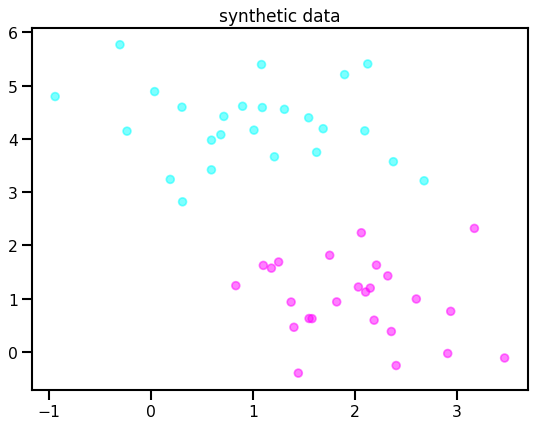

In [5]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(x1[:, 0], x1[:, 1], c=y1, s=50, cmap='cool', alpha = 0.5);
plt.title("synthetic data")
plt.grid(False)

In [6]:
# check the size of the "x_data" array
np.shape(x1)

(50, 2)

In [7]:
np.shape(y1)

(50,)

In [8]:
# concatenate the x matrix and y vector to generate a matrix with the labels in the last column
data_synthetic = np.concatenate([x1,np.reshape(y1,(np.shape(y1)[0],1))], axis = 1)

#### Train perceptron on x1 data

In [9]:
# define the hyperparameters of the perceptron
l_rate = 0.01
n_epoch = 10

In [10]:
# train the weights of the perceptron given the dataset using "train_weights" function
weights, error_epochs = train_weights(data_synthetic, l_rate, n_epoch)

>epoch=0, lrate=0.010, error=7.000
>epoch=1, lrate=0.010, error=5.000
>epoch=2, lrate=0.010, error=3.000
>epoch=3, lrate=0.010, error=2.000
>epoch=4, lrate=0.010, error=3.000
>epoch=5, lrate=0.010, error=3.000
>epoch=6, lrate=0.010, error=2.000
>epoch=7, lrate=0.010, error=0.000
>epoch=8, lrate=0.010, error=0.000
>epoch=9, lrate=0.010, error=0.000


In [11]:
# print the error per epoch vector
error_epochs

array([7., 5., 3., 2., 3., 3., 2., 0., 0., 0.])

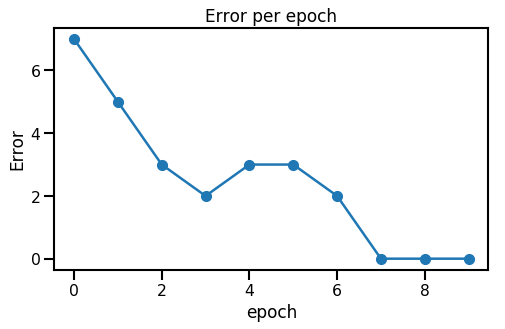

In [12]:
# visualize the error per epoch vector
figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(error_epochs, '-o')
plt.title("Error per epoch")
plt.ylabel("Error")
plt.xlabel("epoch")
plt.show()

### Generate a synthetic random dataset and train a perceptron
- Classes are **NOT** separable

In [13]:
# the cluster_std generate more spread data
x2, y2 = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.99)

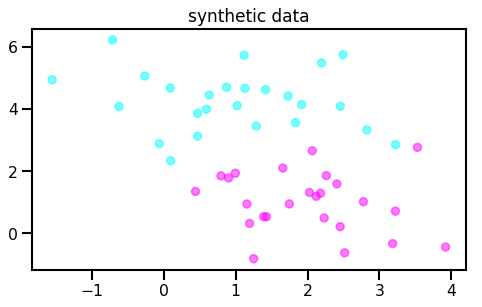

In [14]:
figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x2[:, 0], x2[:, 1], c=y2, s=50, cmap='cool', alpha = 0.5);
plt.title("synthetic data")
plt.grid(False)

In [15]:
# concatenate the x matrix and y vector to generate a matrix with the labels in the last column
data_synthetic_2 = np.concatenate([x2,np.reshape(y2,(np.shape(y2)[0],1))], axis = 1)

In [16]:
# define the hyperparameters of the perceptron
l_rate2 = 0.01
n_epoch2 = 30

In [17]:
# train the weights of the perceptron given the dataset using "train_weights" function
weights2, error_epochs2 = train_weights(data_synthetic_2, l_rate2, n_epoch2)

>epoch=0, lrate=0.010, error=7.000
>epoch=1, lrate=0.010, error=6.000
>epoch=2, lrate=0.010, error=5.000
>epoch=3, lrate=0.010, error=3.000
>epoch=4, lrate=0.010, error=3.000
>epoch=5, lrate=0.010, error=5.000
>epoch=6, lrate=0.010, error=5.000
>epoch=7, lrate=0.010, error=2.000
>epoch=8, lrate=0.010, error=3.000
>epoch=9, lrate=0.010, error=3.000
>epoch=10, lrate=0.010, error=2.000
>epoch=11, lrate=0.010, error=3.000
>epoch=12, lrate=0.010, error=2.000
>epoch=13, lrate=0.010, error=3.000
>epoch=14, lrate=0.010, error=2.000
>epoch=15, lrate=0.010, error=3.000
>epoch=16, lrate=0.010, error=2.000
>epoch=17, lrate=0.010, error=3.000
>epoch=18, lrate=0.010, error=4.000
>epoch=19, lrate=0.010, error=2.000
>epoch=20, lrate=0.010, error=3.000
>epoch=21, lrate=0.010, error=2.000
>epoch=22, lrate=0.010, error=3.000
>epoch=23, lrate=0.010, error=2.000
>epoch=24, lrate=0.010, error=5.000
>epoch=25, lrate=0.010, error=3.000
>epoch=26, lrate=0.010, error=4.000
>epoch=27, lrate=0.010, error=2.000
>e

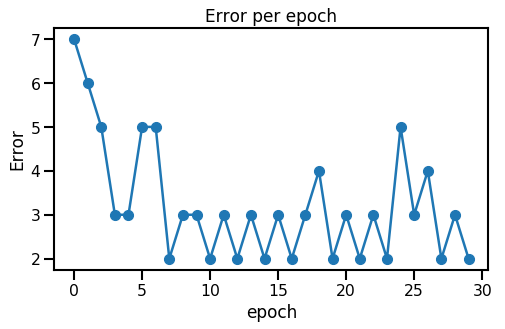

In [18]:
# visualize the error per epoch vector
figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(error_epochs2, '-o')
plt.title("Error per epoch")
plt.ylabel("Error")
plt.xlabel("epoch")
plt.show()

## Train perceptron on Iris dataset

In [19]:
from sklearn.datasets import load_iris
data = load_iris()

# obtain x and y
x_iris = data.data
y_iris = data.target

# since the dataset has 3 classes we only will use 2 of them to make binary classification
x_iris_binary = x_iris[y_iris != 0, :]
y_iris_binary = y_iris[y_iris != 0]
y_iris_binary[y_iris_binary==2] = 0

# adapt the size of y_iris_binary to [n,1]
y_iris_binary = np.reshape(y_iris_binary,(np.shape(y_iris_binary)[0],1))

# create the data matrix where its final column is the labels since that is the defined type of perceptron input
data_iris_binary = np.concatenate((x_iris_binary,y_iris_binary), axis = 1)

In [20]:
# make K-fold partitions of the dataset
from sklearn.model_selection import StratifiedKFold
# determine the number of splits
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(x_iris_binary, y_iris_binary)
# generate the index of each split in order to separate train and test
tr_index = []
te_index = []
for train_index, test_index in skf.split(x_iris_binary, y_iris_binary):
        tr_index.append(train_index)
        te_index.append(test_index)

In [21]:
# define the current fold of the test loop
fold = 0
# separate train and test with the current fold (if its desired a 5 fold cross validation can be done within training)
xtr = x_iris_binary[tr_index[fold],:]
ytr = y_iris_binary[tr_index[fold],]
xte = x_iris_binary[te_index[fold],:]
yte = y_iris_binary[te_index[fold],]

In [22]:
# generate the data matrix that has the final column with the labels for perceptron input
data_tr = np.concatenate((xtr,ytr), axis = 1)

In [23]:
# check the data_tr size
np.shape(data_tr)

(80, 5)

In [35]:
# define the hyperparameters of the perceptron to be trained. Try to use new names (l_rate3 and n_epoch3 for example)

#### code here #####

#### code here #####

In [ ]:
# train the weights of the perceptron with the "train_weights" function and the parameters defined above using the "data_tr" matrix

#### code here #####

#### code here #####

In [36]:
# visualize the error per epoch vector on the current training.

#### code here #####

#### code here #####

In [ ]:
# a) define a final model (using the desired hyperparameters)

# b) use the function "predict" defined above to predict the labels of the test set

# c) compute the accuracy and empirical error comparing the prediciton with the real labels

#### code here #####

#### code here #####

In [ ]:
# Using the same train set compute a KNN and compare the results.